# Intro to Pandas

Pandas is a Python library that is similar to the `datascience` module you have been using in DSC10.  Frankly, I find the official dicumentation ([here](https://pandas.pydata.org/)) kind of confusing, and mostly use Stack Overflow to figure out how to do things.  Here we will go over some of the basic ways to manipulate tabluar data with Pandas.

[This video](https://vimeo.com/59324550) is a good introduction also, and is paired with a Jupyter notebook ([here](http://nbviewer.jupyter.org/urls/gist.github.com/wesm/4757075/raw/a72d3450ad4924d0e74fb57c9f62d1d895ea4574/PandasTour.ipynb)) that covers things slightly differently.

This notebook is adapted from Dennis Tenin's [Lede Program](https://github.com/ledeprogram/courses/blob/master/README.md)

(FYI - more good basketball data is at [538](http://eightthirtyfour.com/data))

In [1]:
import pandas as pd

In [2]:
nba_df = pd.read_csv("NBA 2013.csv")

In [3]:
# Look at the first 10 rows
nba_df.head(10)

,Unnamed: 0,Name,Age,Team,POS,#,2013 $,Ht (In.),WT,EXP,1st Year,DOB,School,City,"State (Province, Territory, Etc..)",Country,Race,HS Only
0,0,"Gee, Alonzo",26,Cavaliers,F,33,"$3,250,000",78,219,4,2009,5/29/1987,Alabama,"Riviera Beach, FL",Florida,US,Black,No
1,1,"Wallace, Gerald",31,Celtics,F,45,"$10,105,855",79,220,12,2001,7/23/1982,Alabama,"Sylacauga, AL",Alabama,US,Black,No
2,2,"Williams, Mo",30,Trail Blazers,G,25,"$2,652,000",73,195,10,2003,12/19/1982,Alabama,"Jackson, MS",Mississippi,US,Black,No
3,3,"Gladness, Mickell",27,Magic,C,40,"$762,195",83,220,2,2011,7/26/1986,Alabama A&M,"Birmingham, AL",Alabama,US,Black,No
4,4,"Jefferson, Richard",33,Jazz,F,44,"$11,046,000",79,230,12,2001,6/21/1980,Arizona,"Los Angeles, CA",California,US,Black,No
5,5,"Hill, Solomon",22,Pacers,F,9,"$1,246,680",79,220,0,2013,3/18/1991,Arizona,"Los Angeles, CA",California,US,Black,No
6,6,"Budinger, Chase",25,Timberwolves,F,10,"$5,000,000",79,218,4,2009,5/22/1988,Arizona,"Encinitas, CA",California,US,White,No
7,7,"Williams, Derrick",22,Timberwolves,F,7,"$5,016,960",80,241,2,2011,5/25/1991,Arizona,"La Mirada, CA",California,US,Black,No
8,8,"Hill, Jordan",26,Lakers,F/C,27,"$3,563,600",82,235,1,2012,7/27/1987,Arizona,"Newberry, SC",South Carolina,US,Black,No
9,9,"Frye, Channing",30,Suns,F/C,8,"$6,500,000",83,245,8,2005,5/17/1983,Arizona,"White Plains, NY",New York,US,Black,No


In [4]:
# Find out how many players are in each position
nba_df["POS"].value_counts()

G      175
F      142
F/C     74
G/F     70
C       67
Name: POS, dtype: int64

In [5]:
nba_df["POS"] == "F"

0       True
1       True
2      False
3      False
4       True
5       True
6       True
7       True
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24      True
25      True
26      True
27     False
28     False
29     False
       ...  
498    False
499    False
500    False
501    False
502    False
503    False
504    False
505    False
506    False
507    False
508    False
509    False
510    False
511    False
512    False
513     True
514    False
515     True
516    False
517    False
518     True
519    False
520    False
521    False
522    False
523     True
524     True
525    False
526     True
527    False
Name: POS, dtype: bool

In [6]:
# Get all of the people who match a certain characteristic
nba_df[nba_df["POS"] == "F"].head(10)

,Unnamed: 0,Name,Age,Team,POS,#,2013 $,Ht (In.),WT,EXP,1st Year,DOB,School,City,"State (Province, Territory, Etc..)",Country,Race,HS Only
0,0,"Gee, Alonzo",26,Cavaliers,F,33,"$3,250,000",78,219,4,2009,5/29/1987,Alabama,"Riviera Beach, FL",Florida,US,Black,No
1,1,"Wallace, Gerald",31,Celtics,F,45,"$10,105,855",79,220,12,2001,7/23/1982,Alabama,"Sylacauga, AL",Alabama,US,Black,No
4,4,"Jefferson, Richard",33,Jazz,F,44,"$11,046,000",79,230,12,2001,6/21/1980,Arizona,"Los Angeles, CA",California,US,Black,No
5,5,"Hill, Solomon",22,Pacers,F,9,"$1,246,680",79,220,0,2013,3/18/1991,Arizona,"Los Angeles, CA",California,US,Black,No
6,6,"Budinger, Chase",25,Timberwolves,F,10,"$5,000,000",79,218,4,2009,5/22/1988,Arizona,"Encinitas, CA",California,US,White,No
7,7,"Williams, Derrick",22,Timberwolves,F,7,"$5,016,960",80,241,2,2011,5/25/1991,Arizona,"La Mirada, CA",California,US,Black,No
24,24,"Miller, Quincy",20,Nuggets,F,30,"$788,872",81,210,1,2012,11/18/1992,Baylor,"North Carolina, IL",Illinois,US,Black,No
25,25,"Acy, Quincy",23,Raptors,F,4,"$788,872",79,225,1,2012,10/6/1990,Baylor,"Tyler, TX",Texas,US,Black,No
26,26,"Jones, Perry",22,Thunder,F,3,"$1,082,520",83,235,1,2012,9/24/1991,Baylor,"Winnsboro, LA",Louisiana,US,Black,No
33,33,"Davies, Brandon",22,Clippers,F,23,NaN,81,235,0,2013,7/25/1991,Brigham Young,"Provo, UT",Utah,US,Black,No


In [7]:
# Get all of the people who match a certain characteristic
nba_df[(nba_df["POS"] == "F") & (nba_df["HS Only"] == "Yes") ].head(10)

,Unnamed: 0,Name,Age,Team,POS,#,2013 $,Ht (In.),WT,EXP,1st Year,DOB,School,City,"State (Province, Territory, Etc..)",Country,Race,HS Only
97,97,"Lewis, Rashard",34,Heat,F,9,"$1,399,507",82,230,15,1998,8/8/1979,Elsik HS (TX),"Pineville, LA",Louisiana,US,Black,Yes
350,350,"Smith, Josh",27,Pistons,F,6,"$13,500,000",81,225,9,2004,12/5/1985,Oak Hill Academy (VA),"College Park, GA",Georgia,US,Black,Yes
401,401,"Wright, Dorell",27,Trail Blazers,F,1,"$3,000,000",81,205,9,2004,12/2/1985,South Kent Prep (CT),"Los Angeles, CA",California,US,Black,Yes
418,418,"Harrington, Al",33,Wizards,F,7,"$884,293",81,245,15,1998,2/17/1980,St. Patrick (NJ),"Orange, NJ",New Jersey,US,Black,Yes
419,419,"James, LeBron",28,Heat,F,6,"$19,067,500",80,250,10,2003,12/30/1984,St. VincentSt. Mary HS (OH),"Akron, OH",Ohio,US,Black,Yes
424,424,"Outlaw, Travis",29,Kings,F,25,"$300,000",81,207,10,2003,9/18/1984,Starkville HS (MS),"Stakville, MS",Mississippi,US,Black,Yes


In [8]:
# Get all of the people who match one of any X characteristics
nba_df[(nba_df["POS"] == "F") | (nba_df["POS"] == "G") ].head(10)

,Unnamed: 0,Name,Age,Team,POS,#,2013 $,Ht (In.),WT,EXP,1st Year,DOB,School,City,"State (Province, Territory, Etc..)",Country,Race,HS Only
0,0,"Gee, Alonzo",26,Cavaliers,F,33,"$3,250,000",78,219,4,2009,5/29/1987,Alabama,"Riviera Beach, FL",Florida,US,Black,No
1,1,"Wallace, Gerald",31,Celtics,F,45,"$10,105,855",79,220,12,2001,7/23/1982,Alabama,"Sylacauga, AL",Alabama,US,Black,No
2,2,"Williams, Mo",30,Trail Blazers,G,25,"$2,652,000",73,195,10,2003,12/19/1982,Alabama,"Jackson, MS",Mississippi,US,Black,No
4,4,"Jefferson, Richard",33,Jazz,F,44,"$11,046,000",79,230,12,2001,6/21/1980,Arizona,"Los Angeles, CA",California,US,Black,No
5,5,"Hill, Solomon",22,Pacers,F,9,"$1,246,680",79,220,0,2013,3/18/1991,Arizona,"Los Angeles, CA",California,US,Black,No
6,6,"Budinger, Chase",25,Timberwolves,F,10,"$5,000,000",79,218,4,2009,5/22/1988,Arizona,"Encinitas, CA",California,US,White,No
7,7,"Williams, Derrick",22,Timberwolves,F,7,"$5,016,960",80,241,2,2011,5/25/1991,Arizona,"La Mirada, CA",California,US,Black,No
10,10,"Bayless, Jerryd",25,Grizzlies,G,7,"$3,135,000",75,200,5,2008,8/20/1988,Arizona,"Phoenix, AZ",Arizona,US,Black,No
11,11,"Terry, Jason",36,Nets,G,31,"$5,625,313",74,180,14,1999,9/15/1977,Arizona,"Seattle, WA",Washington,US,Black,No
12,12,"Fogg, Kyle",23,Nuggets,G,6,NaN,75,183,0,2013,1/27/1990,Arizona,"Brea, CA",California,US,Black,No


In [9]:
# Retrieve what's nan/null/etc
nba_df[pd.isnull(nba_df["Race"])].head()

,Unnamed: 0,Name,Age,Team,POS,#,2013 $,Ht (In.),WT,EXP,1st Year,DOB,School,City,"State (Province, Territory, Etc..)",Country,Race,HS Only
300,300,"Karasev, Sergey",19,Cavaliers,G/F,10,"$1,467,840",79,203,0,2013,10/26/1993,NaN,Saint Petersburg,NaN,Russia,NaN,No


In [10]:
# Retrieve what's NOT nan/null/etc
nba_df[~pd.isnull(nba_df["Race"])].head()

,Unnamed: 0,Name,Age,Team,POS,#,2013 $,Ht (In.),WT,EXP,1st Year,DOB,School,City,"State (Province, Territory, Etc..)",Country,Race,HS Only
0,0,"Gee, Alonzo",26,Cavaliers,F,33,"$3,250,000",78,219,4,2009,5/29/1987,Alabama,"Riviera Beach, FL",Florida,US,Black,No
1,1,"Wallace, Gerald",31,Celtics,F,45,"$10,105,855",79,220,12,2001,7/23/1982,Alabama,"Sylacauga, AL",Alabama,US,Black,No
2,2,"Williams, Mo",30,Trail Blazers,G,25,"$2,652,000",73,195,10,2003,12/19/1982,Alabama,"Jackson, MS",Mississippi,US,Black,No
3,3,"Gladness, Mickell",27,Magic,C,40,"$762,195",83,220,2,2011,7/26/1986,Alabama A&M,"Birmingham, AL",Alabama,US,Black,No
4,4,"Jefferson, Richard",33,Jazz,F,44,"$11,046,000",79,230,12,2001,6/21/1980,Arizona,"Los Angeles, CA",California,US,Black,No


In [11]:
# or this
nba_df[pd.notnull(nba_df["Race"])].head()

,Unnamed: 0,Name,Age,Team,POS,#,2013 $,Ht (In.),WT,EXP,1st Year,DOB,School,City,"State (Province, Territory, Etc..)",Country,Race,HS Only
0,0,"Gee, Alonzo",26,Cavaliers,F,33,"$3,250,000",78,219,4,2009,5/29/1987,Alabama,"Riviera Beach, FL",Florida,US,Black,No
1,1,"Wallace, Gerald",31,Celtics,F,45,"$10,105,855",79,220,12,2001,7/23/1982,Alabama,"Sylacauga, AL",Alabama,US,Black,No
2,2,"Williams, Mo",30,Trail Blazers,G,25,"$2,652,000",73,195,10,2003,12/19/1982,Alabama,"Jackson, MS",Mississippi,US,Black,No
3,3,"Gladness, Mickell",27,Magic,C,40,"$762,195",83,220,2,2011,7/26/1986,Alabama A&M,"Birmingham, AL",Alabama,US,Black,No
4,4,"Jefferson, Richard",33,Jazz,F,44,"$11,046,000",79,230,12,2001,6/21/1980,Arizona,"Los Angeles, CA",California,US,Black,No


In [12]:
# Get the mean age!
nba_df["Age"].mean()

26.242424242424242

In [13]:
# Get numerical data on a column
# If you're dealing with labels or groups, use .value_counts()
nba_df["Age"].describe()

count    528.000000
mean      26.242424
std        4.178868
min       18.000000
25%       23.000000
50%       25.000000
75%       29.000000
max       39.000000
Name: Age, dtype: float64

In [14]:
#access only the min?
nba_df["Age"].describe()['min']

18.0

In [15]:
# Get numerical data on grouped data
nba_df.groupby("POS")["Age"].describe()

POS       
C    count     67.000000
     mean      26.208955
     std        3.800069
     min       19.000000
     25%       23.500000
     50%       26.000000
     75%       28.000000
     max       36.000000
F    count    142.000000
     mean      26.352113
     std        4.122585
     min       20.000000
     25%       23.000000
     50%       25.500000
     75%       29.000000
     max       37.000000
F/C  count     74.000000
     mean      27.175676
     std        4.142523
     min       20.000000
     25%       24.000000
     50%       26.000000
     75%       30.000000
     max       39.000000
G    count    175.000000
     mean      25.725714
     std        4.364719
     min       19.000000
     25%       22.000000
     50%       25.000000
     75%       28.000000
     max       39.000000
G/F  count     70.000000
     mean      26.357143
     std        4.121473
     min       18.000000
     25%       23.000000
     50%       26.000000
     75%       28.750000
     max      

In [16]:
# Remove columns that you HATE with .drop
# Need to save it as a new (or the same) variable
nba_df = nba_df.drop(["City"], axis=1)
nba_df.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Team', 'POS', '#', '2013 $', 'Ht (In.)',
       'WT', 'EXP', '1st Year', 'DOB', 'School',
       'State (Province, Territory, Etc..)', 'Country', 'Race', 'HS Only'],
      dtype='object')

In [17]:
# Calculate a new column from an existing column
nba_df["Ht (Cm.)"] = nba_df["Ht (In.)"] * 2.54
nba_df[:-526]

,Unnamed: 0,Name,Age,Team,POS,#,2013 $,Ht (In.),WT,EXP,1st Year,DOB,School,"State (Province, Territory, Etc..)",Country,Race,HS Only,Ht (Cm.)
0,0,"Gee, Alonzo",26,Cavaliers,F,33,"$3,250,000",78,219,4,2009,5/29/1987,Alabama,Florida,US,Black,No,198.12
1,1,"Wallace, Gerald",31,Celtics,F,45,"$10,105,855",79,220,12,2001,7/23/1982,Alabama,Alabama,US,Black,No,200.66


In [26]:
import numpy as np 
x = np.array([10,20,30, 40])

x[2:2]

array([], dtype=int64)

In [27]:
# String manipulation on an entire column
# Need to use .str to treat it as a string
nba_df["Name"].str.lower()

0             gee, alonzo
1         wallace, gerald
2            williams, mo
3       gladness, mickell
4      jefferson, richard
5           hill, solomon
6         budinger, chase
7       williams, derrick
8            hill, jordan
9          frye, channing
10        bayless, jerryd
11           terry, jason
12             fogg, kyle
13        iguodala, andre
14          boateng, eric
15             diogu, ike
16            ayres, jeff
17          harden, james
18         felix, carrick
19         pargo, jannero
20      beverley, patrick
21           johnson, joe
22         brewer, ronnie
23          fisher, derek
24         miller, quincy
25            acy, quincy
26           jones, perry
27             udoh, ekpe
28             clark, ian
29        andersen, chris
              ...        
498           paul, chris
499          teague, jeff
500            smith, ish
501           duncan, tim
502        hawes, spencer
503          wroten, tony
504          gaddy, abdul
505        t

In [28]:
# has the dataframe changed based on the previous: nba_df["Name"].str.lower() ?
nba_df["Name"]

0             Gee, Alonzo
1         Wallace, Gerald
2            Williams, Mo
3       Gladness, Mickell
4      Jefferson, Richard
5           Hill, Solomon
6         Budinger, Chase
7       Williams, Derrick
8            Hill, Jordan
9          Frye, Channing
10        Bayless, Jerryd
11           Terry, Jason
12             Fogg, Kyle
13        Iguodala, Andre
14          Boateng, Eric
15             Diogu, Ike
16            Ayres, Jeff
17          Harden, James
18         Felix, Carrick
19         Pargo, Jannero
20      Beverley, Patrick
21           Johnson, Joe
22         Brewer, Ronnie
23          Fisher, Derek
24         Miller, Quincy
25            Acy, Quincy
26           Jones, Perry
27             Udoh, Ekpe
28             Clark, Ian
29        Andersen, Chris
              ...        
498           Paul, Chris
499          Teague, Jeff
500            Smith, Ish
501           Duncan, Tim
502        Hawes, Spencer
503          Wroten, Tony
504          Gaddy, Abdul
505        T

In [29]:
# Do more intense manipulation with .apply + an external function
# You will always forget to do axis=1, so remember it!
# Just treat row like a dictionary, it goes one at a time
def do_i_like_them(row):
    if row["Age"] >= 31:
        return False
    else:
        return True

nba_df["Liked"] = nba_df.apply(do_i_like_them, axis=1)
nba_df["Liked"].value_counts()

True     439
False     89
Name: Liked, dtype: int64

In [30]:
# Get one row of a dataframe
nba_df.iloc[0]

Unnamed: 0                                      0
Name                                  Gee, Alonzo
Age                                            26
Team                                    Cavaliers
POS                                             F
#                                              33
2013 $                                 $3,250,000
Ht (In.)                                       78
WT                                            219
EXP                                             4
1st Year                                     2009
DOB                                     5/29/1987
School                                    Alabama
State (Province, Territory, Etc..)        Florida
Country                                        US
Race                                        Black
HS Only                                        No
Ht (Cm.)                                   198.12
Liked                                        True
Name: 0, dtype: object

In [31]:
# For loops with dataframes
# Can't do for row in nba_df, gotta use iterrows()
for index, row in nba_df.iterrows():
    print(str(index) + ": " + row["Name"])

0: Gee, Alonzo
1: Wallace, Gerald
2: Williams, Mo
3: Gladness, Mickell
4: Jefferson, Richard
5: Hill, Solomon
6: Budinger, Chase
7: Williams, Derrick
8: Hill, Jordan
9: Frye, Channing
10: Bayless, Jerryd
11: Terry, Jason
12: Fogg, Kyle
13: Iguodala, Andre
14: Boateng, Eric
15: Diogu, Ike
16: Ayres, Jeff
17: Harden, James
18: Felix, Carrick
19: Pargo, Jannero
20: Beverley, Patrick
21: Johnson, Joe
22: Brewer, Ronnie
23: Fisher, Derek
24: Miller, Quincy
25: Acy, Quincy
26: Jones, Perry
27: Udoh, Ekpe
28: Clark, Ian
29: Andersen, Chris
30: Jackson, Reggie
31: Dudley, Jared
32: O'Bryant, Patrick
33: Davies, Brandon
34: Fredette, Jimmer
35: Mack, Shelvin
36: Hayward, Gordon
37: Anderson, Ryan
38: Crabbe, Allen
39: Griffin, Eric
40: Taylor, Jermaine
41: Kaman, Chris
42: Martin, Kenyon
43: Maxiell, Jason
44: Stephenson, Lance
45: Booker, Trevor
46: Cole, Norris
47: Perkins, Kendrick
48: Copeland, Chris
49: Burks, Alec
50: Billups, Chauncey
51: Roberson, André
52: Smith, Jason
53: Gordon, Ben


In [32]:
# Grouping by as many as you want
# Be sure to put the groupby stuff in square brackets
nba_df.groupby(["POS", "Race"])["Age"].mean()

POS  Race    
C    Black       26.972222
     Hispanic    28.000000
     Mixed       24.600000
     White       25.360000
F    Black       26.160714
     Hispanic    31.000000
     Mixed       29.000000
     White       26.304348
F/C  Black       27.333333
     Hispanic    29.250000
     White       26.454545
G    Asian       25.000000
     Black       25.395833
     Hispanic    29.000000
     Mixed       25.500000
     White       27.105263
G/F  Black       26.237288
     Hispanic    30.000000
     Mixed       24.000000
     White       28.333333
Name: Age, dtype: float64

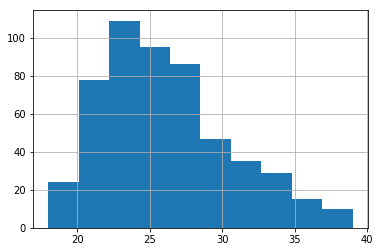

In [34]:
# Histograms
# Shows you the spread of one numerical value
nba_df["Age"].hist()


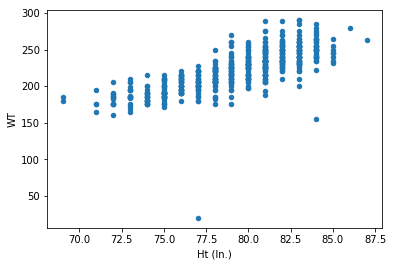

In [35]:
# Scatterplots show you the relationship of two numerical values
nba_df.plot("Ht (In.)","WT", kind='scatter')

In [ ]:
# EXERCISE:
# 0. what is the average weight? is it heavier than the average American?
# 1. create a new value (new column): 
#        the Boby Mass Index, or BMI (follow: http://extoxnet.orst.edu/faqs/dietcancer/web2/twohowto.html)
# The BMI for a typical adult American male is 28.6, according to the CDC, 
# which rates a BMI of 18.5 to 24.9 as “normal” and a BMI of 25 to 29.9 as “overweight.”
# 2. What is the average BMI for professional NBA players? how does it compare to average American male BMI?
# 3. What is the ratio of "normal", "overweight", "obese" ?
#
# 4. Any outliers?

In [ ]:
# STRECH EXERCISE:
# 0. divide all players in groups (based on their role, or height, or another characteristic)
# 1. calculate their mean salary, does it depend on that characteristic?
# 2. can you represent what you found with a nice plot?

In [39]:
nba_df['2013 $'][0]

'$3,250,000'